In [2]:
!pip install av Pillow
import av

## Video Containers

Video files are extremely complex. This is a requirement of both the technology required to compress video data as well as the consumer oriented nature. As such there are are number of abstractions involved in organizing video files. 

For example, in addition to a video, many users would like audio data to go along with the video. There may need to be multiple languages, i.e., multiple audio streams and there may need to be different aspect ratios or directors cuts, i.e. multiple video streams. There may need to be subtitle streams, and all three of these streams need to be synchronized for playback. It may be desireable for users to tag their videos with text indicating genre, director, etc. 

These features are encapsulated in video container formats. Video containers organize metadata (tags) and several playable streams into a single file which can be shared. H264 video streams organize sequences of Network Abstraction Layer Units (NAL Units or NALUs). See the figure below for an rough diagram of a video container with H264 streams.

![video container](https://github.com/Queuecumber/python-bitstream-analysis/raw/main/container.png)

These files are extremely complex themselves and they aren't important for what we want to do. Luckily, FFMPEG, and by extension PyAV, can abstract the process of parsing video containers, selecting individual video streams, and parsing individal packets of video data. For H264, packets will container NALUs as well as timestamp information for playback and synchronization: the Presentation Timestamp (PTS).

## Parsing Video Containers

We have two version of our test video, one which is in an **mp4** (MPEG-4 Part 14) container, and another which is a dump of the raw stream. If we are using the raw stream, then we don't need anything fancy to parse it, we can simply read it in and break the packets up ourselves (although PyAV can do that for us too). Containers are desireable because they are more common though.

Lukily PyAV makes it easy.

Let's inspect the container metadata

In [3]:
container = av.open("../assets/sample.mp4")

for k, v in container.metadata.items():
    print(f'{k}: {v}')
print(f'Duration: {container.duration}')
print(f'Name: {container.format.name}')

major_brand: isom
minor_version: 512
compatible_brands: isomiso2avc1mp41
title: Big Buck Bunny, Sunflower version
artist: Blender Foundation 2008, Janus Bager Kristensen 2013
composer: Sacha Goedegebure
encoder: Lavf58.45.100
comment: Creative Commons Attribution 3.0 - http://bbb3d.renderfarming.net
genre: Animation
Duration: 867000
Name: mov,mp4,m4a,3gp,3g2,mj2


Next we can start parsing packets

In [4]:
for packet in container.demux(video=0):
    if packet.size > 0:
        print(f'NALU Size: {packet.size} bytes, PTS: {packet.pts}')

NALU Size: 75637 bytes, PTS: 0
NALU Size: 4378 bytes, PTS: 3072
NALU Size: 384 bytes, PTS: 1536
NALU Size: 84 bytes, PTS: 512
NALU Size: 168 bytes, PTS: 1024
NALU Size: 291 bytes, PTS: 2048
NALU Size: 335 bytes, PTS: 2560
NALU Size: 7662 bytes, PTS: 7168
NALU Size: 905 bytes, PTS: 5120
NALU Size: 258 bytes, PTS: 3584
NALU Size: 448 bytes, PTS: 4096
NALU Size: 465 bytes, PTS: 4608
NALU Size: 457 bytes, PTS: 5632
NALU Size: 505 bytes, PTS: 6144
NALU Size: 309 bytes, PTS: 6656
NALU Size: 9081 bytes, PTS: 10240
NALU Size: 879 bytes, PTS: 8704
NALU Size: 355 bytes, PTS: 7680
NALU Size: 413 bytes, PTS: 8192
NALU Size: 409 bytes, PTS: 9216
NALU Size: 266 bytes, PTS: 9728
NALU Size: 10093 bytes, PTS: 12800
NALU Size: 613 bytes, PTS: 11264
NALU Size: 306 bytes, PTS: 10752
NALU Size: 384 bytes, PTS: 11776


And we can fully decode the frames using PyAV too

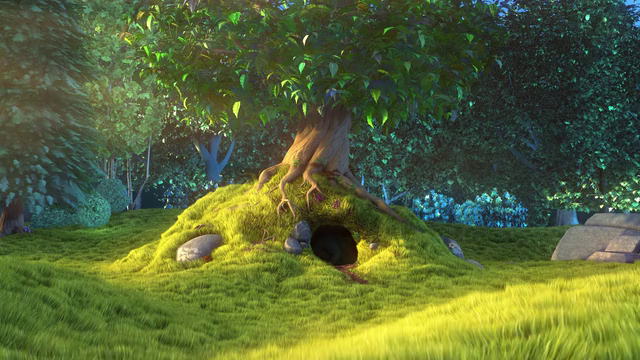

In [6]:
from IPython.display import Image 

container = av.open("../assets/sample.mp4")

for packet in container.demux(video=0):
    if packet.size > 0:
        frames = packet.decode()
        if len(frames) > 0:
            display(frames[0].to_image())
            break
        